In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.linear_model import LinearRegression

os.chdir('/home/c-zitong/cs336-assignment3-scaling')

In [2]:
def read_json_to_dataframe(filepath):
    """
    Read a JSON file and return a pandas DataFrame.
    
    :param filepath: Path to the JSON file
    :return: DataFrame with data from JSON file
    """
    with open(filepath, 'r') as file:
        data = json.load(file)
        # Convert data to DataFrame
        df = pd.DataFrame(data)
        # Convert all columns to float dtype
        df = df.astype(float)
        return df

# Path to your JSON file
filepath = 'data/isoflops_curves.json'

# Read the data from the JSON file into a DataFrame
df = read_json_to_dataframe(filepath)

# Print the DataFrame
print(df)

      parameters  compute_budget  final_loss
0   5.000000e+07    6.000000e+18    7.192785
1   7.873050e+07    6.000000e+18    6.750171
2   1.239698e+08    6.000000e+18    6.406640
3   1.952042e+08    6.000000e+18    6.154369
4   3.073705e+08    6.000000e+18    5.987783
..           ...             ...         ...
67  1.214891e+10    3.000000e+21    3.773188
68  2.057799e+10    3.000000e+21    3.776239
69  3.485528e+10    3.000000e+21    3.816546
70  5.903836e+10    3.000000e+21    3.895885
71  1.000000e+11    3.000000e+21    4.017389

[72 rows x 3 columns]


In [3]:
# Assuming df is your DataFrame loaded from the JSON file

# Find unique compute_budget values
unique_budgets = df['compute_budget'].unique()

# Prepare a list to hold the results
results = []

# Iterate over each unique compute_budget
for budget in unique_budgets:
    # Filter the DataFrame for the current budget
    budget_df = df[df['compute_budget'] == budget]
    
    # Find the row with the lowest final_loss
    min_loss_index = budget_df['final_loss'].idxmin()
    min_loss_row = budget_df.loc[min_loss_index]
    
    # Calculate the number of tokens for the row with the lowest final_loss
    num_of_tokens = min_loss_row['compute_budget'] / (6 * min_loss_row['parameters'])
    
    # Append the results to the list, ensuring all necessary conversions to float
    results.append({
        'final_loss': min_loss_row['final_loss'],
        'compute_budget': min_loss_row['compute_budget'],
        'parameters': min_loss_row['parameters'],
        'num_of_tokens': num_of_tokens
    })

# Concatenate all results into a new DataFrame
results_df = pd.DataFrame(results)

# Print the new DataFrame
print(results_df)


   final_loss  compute_budget    parameters  num_of_tokens
0    5.899930    6.000000e+18  7.620934e+08   1.312175e+09
1    5.617943    1.000000e+19  8.066477e+08   2.066164e+09
2    5.107177    3.000000e+19  1.536852e+09   3.253403e+09
3    4.830586    6.000000e+19  1.952042e+09   5.122841e+09
4    4.652893    1.000000e+20  3.253403e+09   5.122841e+09
5    4.311219    3.000000e+20  5.903836e+09   8.469070e+09
6    4.121241    6.000000e+20  6.971056e+09   1.434503e+10
7    4.002835    1.000000e+21  6.859329e+09   2.429781e+10
8    3.773188    3.000000e+21  1.214891e+10   4.115597e+10


# (a)

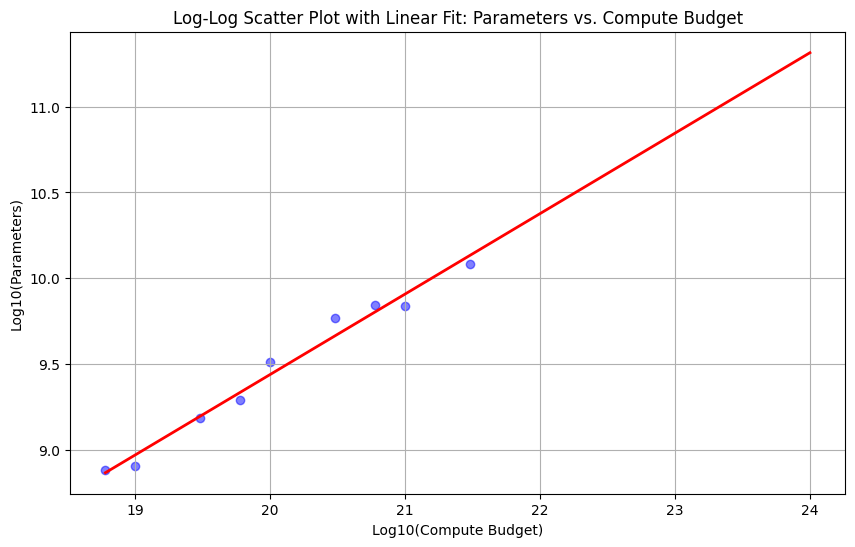

Predicted model size for a budget of 10^23 FLOPs: 7.01e+01B parameters


In [4]:
# Assuming results_df is your DataFrame with the necessary columns

# Transforming compute_budget and parameters to their logarithmic values (base 10)
results_df['log_compute_budget'] = np.log10(results_df['compute_budget'])
results_df['log_parameters'] = np.log10(results_df['parameters'])

# Fitting a linear regression model
model = LinearRegression()
X = results_df[['log_compute_budget']]  # Ensure X is a DataFrame with named columns
y = results_df['log_parameters']
model.fit(X, y)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(results_df['log_compute_budget'], results_df['log_parameters'], color='blue', alpha=0.5)

# Create the line of best fit
x_values = np.linspace(results_df['log_compute_budget'].min(), 24, 400)  # Extending to log10(10^24)
y_values = model.predict(pd.DataFrame(x_values, columns=['log_compute_budget']))  # Ensuring input is properly formatted

# Plotting the line
plt.plot(x_values, y_values, 'r-', linewidth=2)

# Adding title and labels
plt.title('Log-Log Scatter Plot with Linear Fit: Parameters vs. Compute Budget')
plt.xlabel('Log10(Compute Budget)')
plt.ylabel('Log10(Parameters)')

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

# Predict the log10 of parameters for a compute_budget of 10^23 FLOPs
log_budget_23 = np.log10(10.0**23)
predicted_log_parameters = model.predict(pd.DataFrame([log_budget_23], columns=['log_compute_budget']))  # DataFrame with column name

# Convert back from log10 to the actual number of parameters
predicted_parameters = 10**predicted_log_parameters[0]

print(f"Predicted model size for a budget of 10^23 FLOPs: {predicted_parameters/10**9:.2e}B parameters")

# (b)

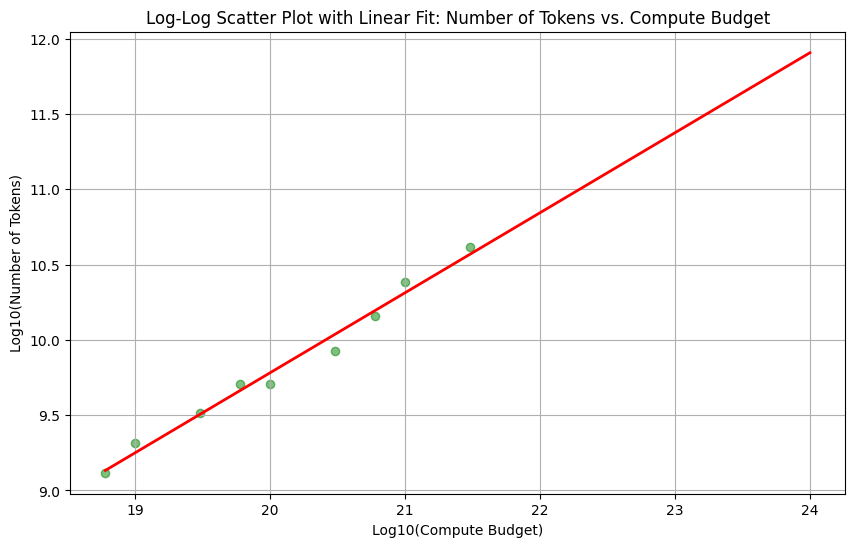

Predicted number of tokens for a budget of 10^24 FLOPs: 8.09e+02B


In [5]:
# Assuming results_df is already created and contains 'compute_budget', 'parameters', 'num_of_tokens'

# Transform compute_budget and num_of_tokens to their logarithmic values (base 10)
results_df['log_compute_budget'] = np.log10(results_df['compute_budget'])
results_df['log_num_of_tokens'] = np.log10(results_df['num_of_tokens'])

# Fitting a linear regression model to log_compute_budget and log_num_of_tokens
model_tokens = LinearRegression()
X_tokens = results_df[['log_compute_budget']]  # Using DataFrame to maintain the feature name
y_tokens = results_df['log_num_of_tokens']
model_tokens.fit(X_tokens, y_tokens)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(results_df['log_compute_budget'], results_df['log_num_of_tokens'], color='green', alpha=0.5)

# Create the line of best fit
x_values_tokens = np.linspace(results_df['log_compute_budget'].min(), 24, 400)  # Extending to log10(10^24)
y_values_tokens = model_tokens.predict(pd.DataFrame(x_values_tokens, columns=['log_compute_budget']))  # Correct format

# Plotting the line
plt.plot(x_values_tokens, y_values_tokens, 'r-', linewidth=2)

# Adding title and labels
plt.title('Log-Log Scatter Plot with Linear Fit: Number of Tokens vs. Compute Budget')
plt.xlabel('Log10(Compute Budget)')
plt.ylabel('Log10(Number of Tokens)')

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

# Predict the log10 of number of tokens for a compute_budget of 10^24 FLOPs
log_budget_24 = np.log10(10.0**24)
predicted_log_tokens = model_tokens.predict(pd.DataFrame([log_budget_24], columns=['log_compute_budget']))

# Convert back from log10 to the actual number of tokens
predicted_tokens = 10**predicted_log_tokens[0]

print(f"Predicted number of tokens for a budget of 10^24 FLOPs: {predicted_tokens/10**9:.2e}B")